# Name: Neeraj Bapat
# Sparks Foundation Internship
# Task I:
## Prediction using Decision Tree Algorithm

# Objective :
## Create the Decision Tree classifier and visualize it graphically.

## Importing libraries & Reading the data

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\DELL\Desktop\Python Data\Sparksfoundation\Decision Tree\Iris.csv")

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Data Pre-processing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
# Id column here is not needed for making of the model

### Removing Irrelevant Variable

In [7]:
data = data.drop(["Id"], axis = 1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Checking Missing Values

In [8]:
data.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
# There are no missing values in the data

### Checking Outliers

<AxesSubplot:>

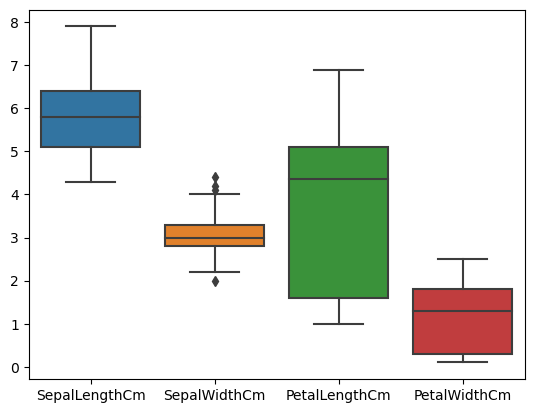

In [10]:
import seaborn as sns
sns.boxplot(data=data)

In [11]:
# as we can see, there are few outliers in sepalwidth data

### Winsorizing Technique - Treatment of outliers

In [12]:
q1 = data['SepalWidthCm'].quantile(0.25)
q3 = data['SepalWidthCm'].quantile(0.75)
iqr = q3-q1 #Interquartile range
upper_limit = q3 + 1.5 * iqr # acceptable range
print(upper_limit)
lower_limit = q1 - 1.5 * iqr # acceptable range
print(lower_limit)

4.05
2.05


In [13]:
data['SepalWidthCm']=np.where(data['SepalWidthCm'] > upper_limit,upper_limit,data['SepalWidthCm']) # upper limit

In [14]:
data['SepalWidthCm']=np.where(data['SepalWidthCm'] < lower_limit,lower_limit,data['SepalWidthCm']) # lower limit

<AxesSubplot:>

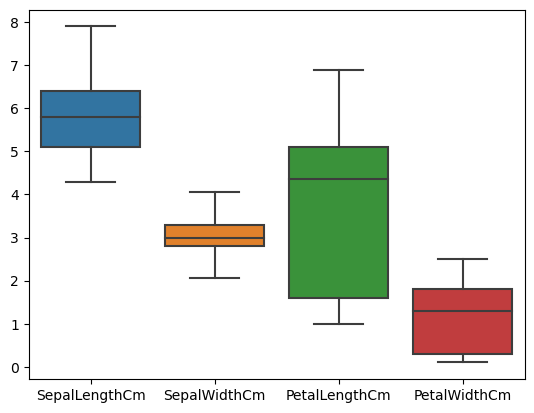

In [15]:
import seaborn as sns
sns.boxplot(data=data)

In [16]:
# Outliers are removed in SepalWidthCm

### Label Encoding

In [17]:
x = data.drop(['Species'],axis=1)
y = data[['Species']]

In [18]:
#Converting categorical y variable to numerical variable
from sklearn.preprocessing import LabelEncoder
y=y.apply(LabelEncoder().fit_transform)
y.tail()
# labelled in ascending order

,Species
145,2
146,2
147,2
148,2
149,2


## Data Partition

In [19]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split

# Train test split

X_train, X_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state=200)

## Model Building

In [20]:
#Import Tree Classifier model
from sklearn import tree

df = tree.DecisionTreeClassifier()  # by default it use Gini index for split
#Train the model using the training sets
df.fit(X_train,y_train)  # Model = df

DecisionTreeClassifier()

## Plotting the Tree

In [21]:
train=pd.concat([y_train,X_train],axis=1)
train.head()

,Species,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
119,2,6.0,2.2,5.0,1.5
135,2,7.7,3.0,6.1,2.3
25,0,5.0,3.0,1.6,0.2
143,2,6.8,3.2,5.9,2.3
87,1,6.3,2.3,4.4,1.3


In [22]:
independent_variable = list(train.columns[1:])
independent_variable

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

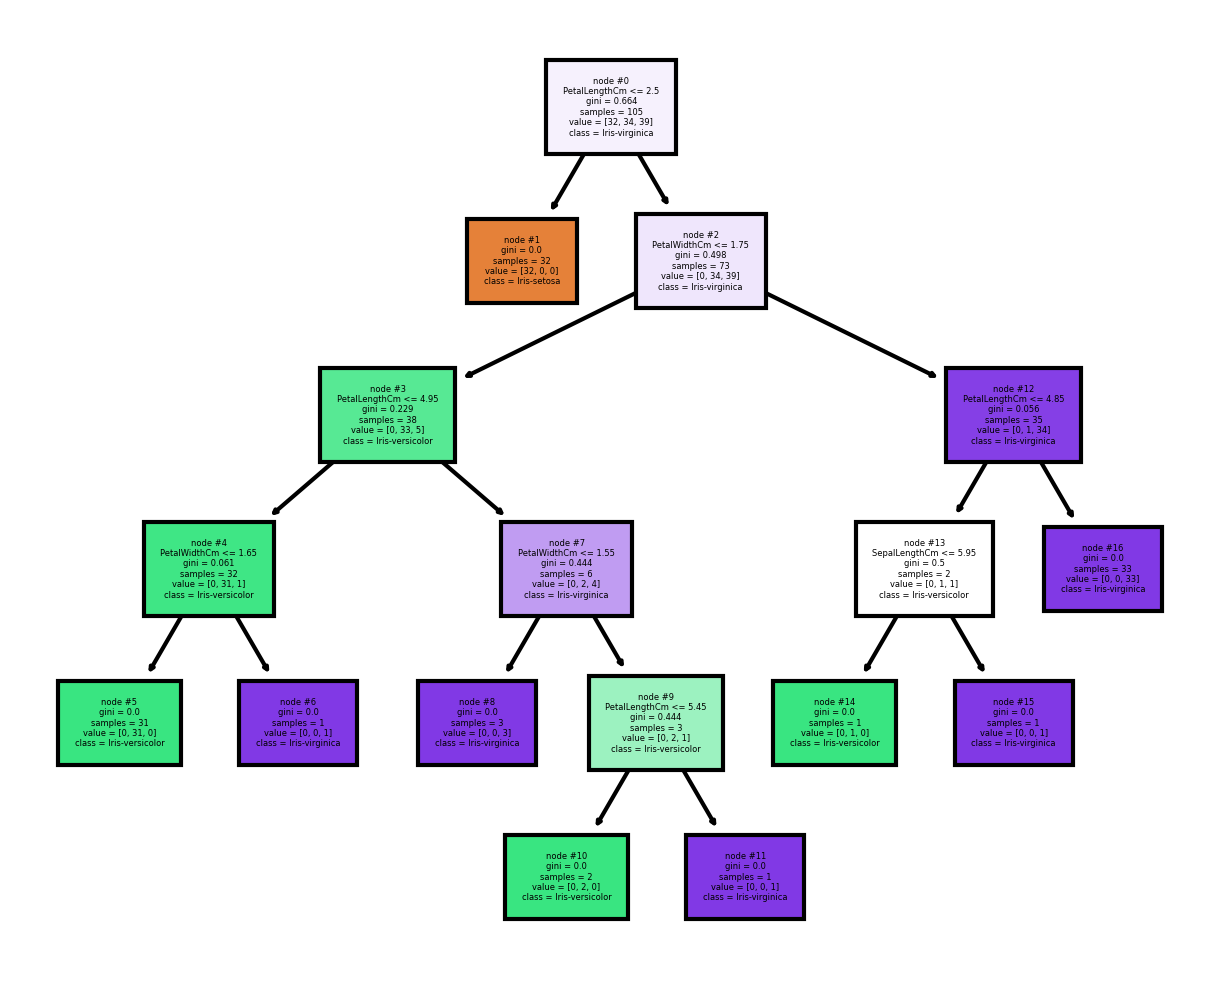

In [23]:
from sklearn import tree
import matplotlib.pyplot as plt

species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']  # array
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,4), dpi=300)
tree.plot_tree(df,  # Model 
               feature_names = independent_variable,  # column name
               class_names=species, 
               filled = True, # colour
              node_ids=True, # node number
              fontsize=2); # 

## Prediction on Train Dataset

In [24]:
train.head()

,Species,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
119,2,6.0,2.2,5.0,1.5
135,2,7.7,3.0,6.1,2.3
25,0,5.0,3.0,1.6,0.2
143,2,6.8,3.2,5.9,2.3
87,1,6.3,2.3,4.4,1.3


In [25]:
train['Predicted']=df.predict(X_train)  # MODEL = df
train.head()

,Species,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Predicted
119,2,6.0,2.2,5.0,1.5,2
135,2,7.7,3.0,6.1,2.3,2
25,0,5.0,3.0,1.6,0.2,0
143,2,6.8,3.2,5.9,2.3,2
87,1,6.3,2.3,4.4,1.3,1


## Performance of Model

In [26]:
from sklearn.metrics import confusion_matrix  
matrix = confusion_matrix(train['Predicted'],train['Species'])
print(matrix)

[[32  0  0]
 [ 0 34  0]
 [ 0  0 39]]


In [27]:
from sklearn.metrics import classification_report
print(classification_report(train['Species'], train['Predicted']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        39

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



In [28]:
# We can see that the model gives us 100% accuracy on train data

## Predictions of Test Data

In [29]:
test=pd.concat([X_test,y_test],axis=1)
test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
84,5.4,3.0,4.5,1.5,1
122,7.7,2.8,6.7,2.0,2
28,5.2,3.4,1.4,0.2,0
24,4.8,3.4,1.9,0.2,0
75,6.6,3.0,4.4,1.4,1


In [30]:
test['Predicted']=df.predict(X_test)
test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predicted
84,5.4,3.0,4.5,1.5,1,1
122,7.7,2.8,6.7,2.0,2,2
28,5.2,3.4,1.4,0.2,0,0
24,4.8,3.4,1.9,0.2,0,0
75,6.6,3.0,4.4,1.4,1,1


## Model Performance on Test data

In [31]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(test['Predicted'],test['Species'])
print(confusion_matrix)

[[18  0  0]
 [ 0 16  0]
 [ 0  0 11]]


In [32]:
from sklearn.metrics import classification_report
print(classification_report(test['Species'], test['Predicted']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        11

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [33]:
# In the test data also, we get 100% accuracy

### So, if we feed any new data , the decision tree will predict it's species

# Thank You
# Finish